In [1]:
# Normalise features
# Find the optimal parameters C (inverse regulalisation strengths)
# Find the best features to predict stock movement (up or down)
# Convert probability into absolute values (stock % increase/decrease)
# SVC, RandomForest, MinMax, LongShortTermMemory

%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell
from jupyterthemes import jtplot

#import classes
from company import Company
from onestep_baseline_company import OneStepBaselineCompany
from onestep_lstm_company import OneStepLSTMCompany
from multistep_baseline_company import MultiStepBaselineCompany
#from multistep_lstm_company import MultiStepLSTMCompany
jtplot.style(theme='grade3')



Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
start_train_date = "01/01/2018"
end_train_start_test_date = "01/02/2018"
end_test_date = "01/12/2018"

date
2018-02-02    42.49
2018-02-05    40.82
2018-02-06    39.40
2018-02-07    43.88
2018-02-08    42.01
2018-02-09    40.00
2018-02-12    40.41
2018-02-13    42.19
2018-02-14    42.63
2018-02-15    43.45
2018-02-16    43.50
2018-02-20    44.21
2018-02-21    44.90
2018-02-22    44.54
2018-02-23    44.25
2018-02-26    46.53
2018-02-27    47.98
2018-02-28    48.58
2018-03-01    48.81
2018-03-02    47.62
2018-03-05    49.11
2018-03-06    52.03
2018-03-07    53.74
2018-03-08    53.97
2018-03-09    55.22
2018-03-12    54.59
2018-03-13    59.37
2018-03-14    59.43
2018-03-15    59.78
2018-03-16    58.84
              ...  
2018-10-19    41.30
2018-10-22    40.45
2018-10-23    39.76
2018-10-24    38.68
2018-10-25    35.43
2018-10-26    36.78
2018-10-29    35.40
2018-10-30    34.66
2018-10-31    36.01
2018-11-01    37.72
2018-11-02    40.12
2018-11-05    40.32
2018-11-06    39.92
2018-11-07    39.80
2018-11-08    40.93
2018-11-09    40.44
2018-11-12    39.11
2018-11-13    37.44
2018-11-14    3

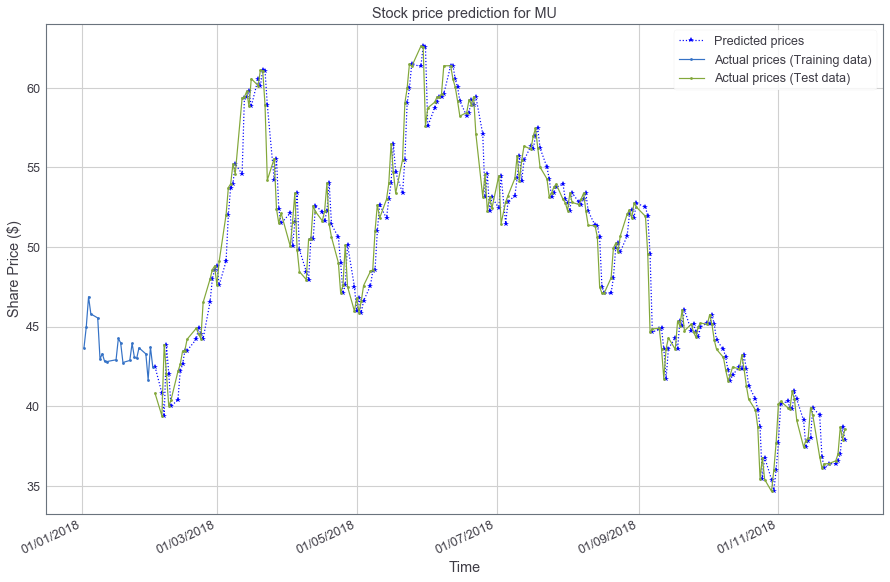

Baseline RMSE Score: 1.491 US dollar
Baseline trend Score: 1.4 %


In [3]:

company_baseline = OneStepBaselineCompany("MU", start_train_date, end_train_start_test_date, end_test_date)
company_baseline.train()
predictions = company_baseline.predict()
display(predictions)
company_baseline.plot(predictions)
rmse_score = company_baseline.score(metric="rmse", predictions=predictions)
print("Baseline RMSE Score: %.3f US dollar" % rmse_score)
trend_score = company_baseline.score(metric="trend", predictions=predictions)
print("Baseline trend Score: %.1f %%" % (trend_score*100))


In [29]:
start_train_date = "01/01/2018"
end_train_start_test_date = "01/05/2018"
end_test_date = "10/12/2018"

one_step_lstm = OneStepLSTMCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                         n_epochs=3000, n_batch=1, n_neurons=4)
one_step_lstm.train()


size of train_raw data:  83


date
2018-01-02    43.67
2018-01-03    44.98
2018-01-04    46.88
2018-01-05    45.80
2018-01-08    45.55
2018-01-09    42.97
2018-01-10    43.31
2018-01-11    42.82
2018-01-12    42.81
2018-01-16    42.92
2018-01-17    44.26
2018-01-18    43.99
2018-01-19    42.75
2018-01-22    42.88
2018-01-23    43.95
2018-01-24    43.08
2018-01-25    43.01
2018-01-26    43.67
2018-01-29    43.29
2018-01-30    41.67
2018-01-31    43.72
2018-02-01    42.49
2018-02-02    40.82
2018-02-05    39.40
2018-02-06    43.88
2018-02-07    42.01
2018-02-08    40.00
2018-02-09    40.41
2018-02-12    42.19
2018-02-13    42.63
              ...  
2018-03-20    61.15
2018-03-21    61.07
2018-03-22    58.92
2018-03-23    54.21
2018-03-26    55.56
2018-03-27    52.40
2018-03-28    51.49
2018-03-29    52.14
2018-04-02    50.06
2018-04-03    51.55
2018-04-04    53.39
2018-04-05    49.84
2018-04-06    48.46
2018-04-09    47.96
2018-04-10    50.48
2018-04-11    50.48
2018-04-12    52.59
2018-04-13    52.23
2018-04-16    5

size of test_raw data:  154


date
2018-05-02    45.89
2018-05-03    46.62
2018-05-04    47.58
2018-05-07    48.48
2018-05-08    48.57
2018-05-09    51.01
2018-05-10    52.66
2018-05-11    51.82
2018-05-14    53.00
2018-05-15    54.01
2018-05-16    56.50
2018-05-17    54.70
2018-05-18    53.39
2018-05-21    55.48
2018-05-22    59.03
2018-05-23    59.97
2018-05-24    61.49
2018-05-25    61.35
2018-05-29    62.62
2018-05-30    62.57
2018-05-31    57.59
2018-06-01    58.74
2018-06-04    59.10
2018-06-05    59.41
2018-06-06    59.42
2018-06-07    59.63
2018-06-08    61.39
2018-06-11    61.39
2018-06-12    60.55
2018-06-13    60.05
              ...  
2018-10-26    35.40
2018-10-29    34.66
2018-10-30    36.01
2018-10-31    37.72
2018-11-01    40.12
2018-11-02    40.32
2018-11-05    39.92
2018-11-06    39.80
2018-11-07    40.93
2018-11-08    40.44
2018-11-09    39.11
2018-11-12    37.44
2018-11-13    37.85
2018-11-14    38.03
2018-11-15    39.91
2018-11-16    39.44
2018-11-19    36.83
2018-11-20    36.12
2018-11-21    3

size of supervised train_scaled data:  82
[[-0.00737619  0.2687039 ]
 [ 0.2687039   0.39304531]
 [ 0.39304531 -0.23498419]
 [-0.23498419 -0.06006322]
 [-0.06006322 -0.55110643]
 [-0.55110643  0.06427819]
 [ 0.06427819 -0.11064278]
 [-0.11064278 -0.00948367]
 [-0.00948367  0.01580611]
 [ 0.01580611  0.27502634]
 [ 0.27502634 -0.06427819]
 [-0.06427819 -0.2687039 ]
 [-0.2687039   0.02002107]
 [ 0.02002107  0.21812434]
 [ 0.21812434 -0.19072708]
 [-0.19072708 -0.02212856]
 [-0.02212856  0.1317176 ]
 [ 0.1317176  -0.08746048]
 [-0.08746048 -0.3487882 ]
 [-0.3487882   0.42465753]
 [ 0.42465753 -0.26659642]
 [-0.26659642 -0.35932561]
 [-0.35932561 -0.30663857]
 [-0.30663857  0.93677555]
 [ 0.93677555 -0.40147524]
 [-0.40147524 -0.43097998]
 [-0.43097998  0.07903056]
 [ 0.07903056  0.36775553]
 [ 0.36775553  0.085353  ]
 [ 0.085353    0.1654373 ]
 [ 0.1654373   0.00316122]
 [ 0.00316122  0.14225501]
 [ 0.14225501  0.13804004]
 [ 0.13804004 -0.08324552]
 [-0.08324552 -0.06849315]
 [-0.06849315

X:  [0.16332982] y:  0.1464699683877768
invert difference to  46.62
X:  [0.14646997] y:  0.1949420442571138
invert difference to  47.58
X:  [0.19494204] y:  0.1822971548998952
invert difference to  48.48
X:  [0.18229715] y:  0.011591148577451433
invert difference to  48.57
X:  [0.01159115] y:  0.5068493150684937
invert difference to  51.01
X:  [0.50684932] y:  0.34035827186512185
invert difference to  52.66
X:  [0.34035827] y:  -0.18440463645942953
invert difference to  51.82
X:  [-0.18440464] y:  0.24130663856691337
invert difference to  53.0
X:  [0.24130664] y:  0.20547945205479498
invert difference to  54.01
X:  [0.20547945] y:  0.5173867228661764
invert difference to  56.5
X:  [0.51738672] y:  -0.38672286617491985
invert difference to  54.7
X:  [-0.38672287] y:  -0.2834562697576395
invert difference to  53.39
X:  [-0.28345627] y:  0.43308746048472097
invert difference to  55.48
X:  [0.43308746] y:  0.7407797681770305
invert difference to  59.03
X:  [0.74077977] y:  0.19072708113804

X:  [0.27713383] y:  -0.29820864067439407
invert difference to  35.4
X:  [-0.29820864] y:  -0.1633298208640672
invert difference to  34.66
X:  [-0.16332982] y:  0.2771338250790318
invert difference to  36.01
X:  [0.27713383] y:  0.35300316122234043
invert difference to  37.72
X:  [0.35300316] y:  0.49841938883034853
invert difference to  40.12
X:  [0.49841939] y:  0.03477344573235122
invert difference to  40.32
X:  [0.03477345] y:  -0.09167544783983039
invert difference to  39.92
X:  [-0.09167545] y:  -0.0326659641728137
invert difference to  39.8
X:  [-0.03266596] y:  0.2307692307692322
invert difference to  40.93
X:  [0.23076923] y:  -0.1106427818756583
invert difference to  40.44
X:  [-0.11064278] y:  -0.28767123287671137
invert difference to  39.11
X:  [-0.28767123] y:  -0.35932560590094814
invert difference to  37.44
X:  [-0.35932561] y:  0.07903055848261487
invert difference to  37.85
X:  [0.07903056] y:  0.03055848261327785
invert difference to  38.03
X:  [0.03055848] y:  0.3888

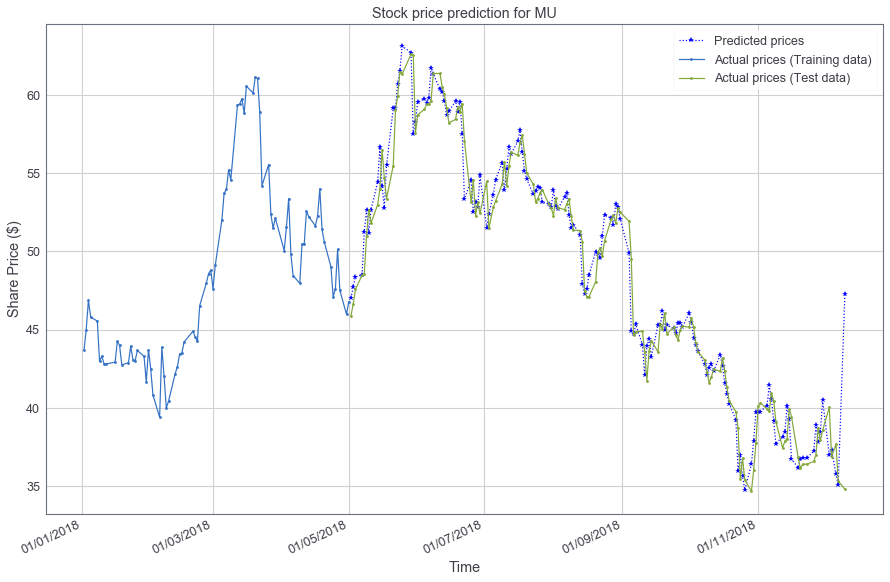

LSTM RMSE Score: 1.698 US dollar
LSTM trend Score: 75.3 %


Yesterday price:  [0.16332982]
X:  [0.16332982]
2018-05-02    47.04813
dtype: float64


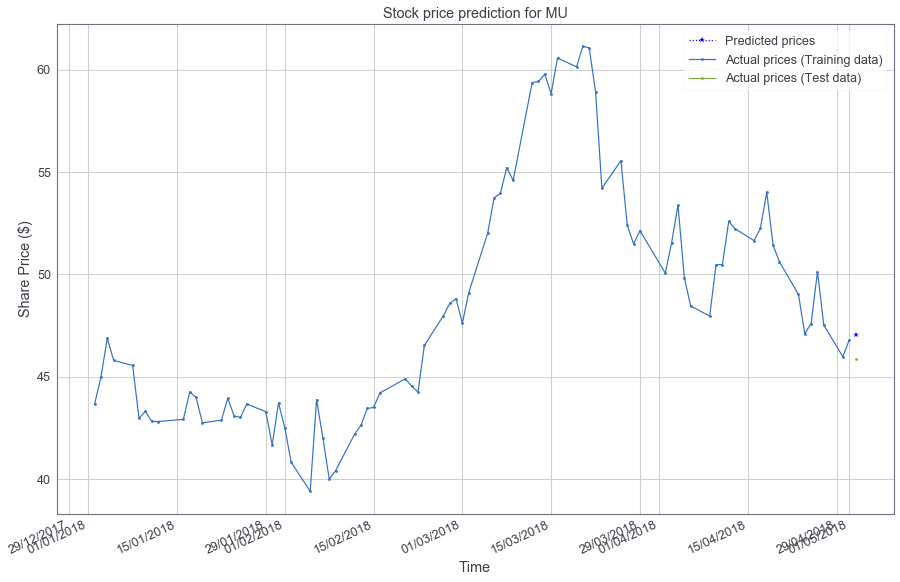

In [30]:
jtplot.style(theme='grade3')


predictions = one_step_lstm.predict()
one_step_lstm.plot(predictions)

lstm_score = one_step_lstm.score(metric="rmse", predictions=predictions)
print("LSTM RMSE Score: %.3f US dollar" % lstm_score)
trend_score = one_step_lstm.score(metric="trend", predictions=predictions)
print("LSTM trend Score: %.1f %%" % (trend_score*100))

print("\n")
one_day_pred = one_step_lstm.forecast_lstm_one_step()
one_step_lstm.plot(one_day_pred)


In [ ]:
# load dataset
start_train_date = "01/01/2018"
end_train_start_test_date = "01/05/2018"
end_test_date = "01/10/2018"

multi_step_baseline = MultiStepBaselineCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                                               n_lag=1, n_seq=3)
predictions = multi_step_baseline.predict()
#display(predictions)
#display(multi_step_baseline.test_raw_series.values)
#display(type(multi_step_baseline.test_raw_series.values))
multi_step_baseline.plot(predictions)
multi_step_baseline.score(predictions)



In [36]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from numpy import array
from company import Company

class MultiStepLSTMCompany(Company):
    def __init__(self, name, train_start_date_string, train_end_test_start_date_string, test_end_date_string,
                 n_lag, n_seq, n_epochs, n_batch, n_neurons):
        Company.__init__(self, name)
        self.scaler = None
        self.train_raw_series = self.get_share_prices(train_start_date_string, train_end_test_start_date_string)
        self.test_raw_series = self.get_share_prices(train_end_test_start_date_string, test_end_date_string,
                                                     start_delay=1)
        self.n_lag = n_lag
        self.n_seq = n_seq
        self.n_epochs = n_epochs
        self.n_batch = n_batch
        self.n_neurons = n_neurons
        self.train, self.test = self.preprocess_data()

    # create a differenced series
    def difference(self, series, source, interval=1):
        diff = list()
        # First item is special case because we use the difference of the last training pair to predict the first test price
        if source == "test":
            diff.append(self.train_raw_series.values[-1] - self.train_raw_series.values[-2])
        for i in range(1, len(series)):
            value = series[i] - series[i - 1]
            diff.append(value)
        # Last item is special case because there is no next value thus the diff is
        # 1 size shorter than the original test_raw. We fix this by adding an additional item
        if source == "test":
            diff.append(0)  # placeholder for the last prediction, not used in anyway
        return pd.Series(diff)

    # convert time series into supervised learning problem
    def series_to_supervised(self, data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
        # put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
            agg.dropna(inplace=True)
        return agg

    # scale train and test data to [-1, 1]
    def scale(self, train, test):
        # fit scaler
        scaler = MinMaxScaler(feature_range=(-1, 1))
        scaler = scaler.fit(train)
        # transform train
        train = train.reshape(train.shape[0], train.shape[1])
        train_scaled = scaler.transform(train)
        # transform test
        test = test.reshape(test.shape[0], test.shape[1])
        test_scaled = scaler.transform(test)
        return scaler, train_scaled, test_scaled

    # transform series into train and test sets for supervised learning
    def preprocess_data(self):
        if self.n_seq > len(self.train_raw_series):
            raise ValueError("There are no enough training data for", self.n_seq, "sequential forecast")
        # extract raw values
        train_raw_values = self.train_raw_series.values
        train_raw_values = train_raw_values.reshape(len(train_raw_values), 1)
        # transform into supervised learning problem X, y
        supervised_train = self.series_to_supervised(train_raw_values, self.n_lag, self.n_seq)
        train = supervised_train.values

        # extract raw values
        test_raw_values = self.test_raw_series.values
        test_raw_values = test_raw_values.reshape(len(test_raw_values), 1)
        # transform into supervised learning problem X, y
        supervised_test = self.series_to_supervised(test_raw_values, self.n_lag, self.n_seq)
        test = supervised_test.values

        # transform the scale of the data
        scaler, train_scaled, test_scaled = self.scale(train, test)
        self.scaler = scaler
        """
        print("train size: ", len(self.train_raw_series), "  train supervised size: ", len(supervised_train_values))
        display(self.train_raw_series)
        display(supervised_train_values)
        print("test size: ", len(self.test_raw_series), "  test supervised size: ", len(supervised_test_values))
        display(self.test_raw_series)
        display(supervised_test_values)
        """
        return train_scaled, test_scaled

        # fit the model

    def train(self):
        print("Fitting the model")
        self.lstm_model = self.fit_lstm(self.train_scaled)
        # forecast the entire training dataset to build up state for forecasting
        train_reshaped = self.train_scaled[:, 0].reshape(len(self.train_scaled), 1, 1)
        self.lstm_model.predict(train_reshaped, batch_size=self.n_batch)
        print("Finished fitting the model")

    # fit an LSTM network to training data
    def fit_lstm(self, train):
        # reshape training into [samples, timesteps, features]
        X, y = train[:, 0:self.n_lag], train[:, self.n_lag:]
        X = X.reshape(X.shape[0], 1, X.shape[1])
        # design network
        model = Sequential()
        model.add(LSTM(self.n_neurons, batch_input_shape=(self.n_batch, X.shape[1], X.shape[2]), stateful=True))
        model.add(Dense(y.shape[1]))
        model.compile(loss='mean_squared_error', optimizer='adam')
        # fit network
        for i in range(self.n_epoch):
            model.fit(X, y, epochs=1, batch_size=self.n_batch, verbose=0, shuffle=False)
            model.reset_states()
        return model

    # make one forecast with an LSTM,
    def forecast_lstm(self, model, X, n_batch):
        # reshape input pattern to [samples, timesteps, features]
        X = X.reshape(1, 1, len(X))
        # make forecast
        forecast = model.predict(X, batch_size=n_batch)
        # convert to array
        return [x for x in forecast[0, :]]

    # evaluate the persistence model
    def make_forecasts(self, model, n_batch, train, test, n_lag, n_seq):
        forecasts = list()
        for i in range(len(test)):
            X, y = test[i, 0:n_lag], test[i, n_lag:]
            # make forecast
            forecast = self.forecast_lstm(model, X, n_batch)
            # store the forecast
            forecasts.append(forecast)
        return forecasts

    # invert differenced forecast
    def inverse_difference(self, last_ob, forecast):
        # invert first forecast
        inverted = list()
        inverted.append(forecast[0] + last_ob)
        # propagate difference forecast using inverted first value
        for i in range(1, len(forecast)):
            inverted.append(forecast[i] + inverted[i - 1])
        return inverted

    # inverse data transform on forecasts
    def inverse_transform(self, series, forecasts, scaler, n_test):
        inverted = list()
        for i in range(len(forecasts)):
            # create array from forecast
            forecast = array(forecasts[i])
            forecast = forecast.reshape(1, len(forecast))
            # invert scaling
            inv_scale = scaler.inverse_transform(forecast)
            inv_scale = inv_scale[0, :]
            # invert differencing
            index = len(series) - n_test + i - 1
            last_ob = series.values[index]
            inv_diff = self.inverse_difference(last_ob, inv_scale)
            # store
            inverted.append(inv_diff)
        return inverted

    # plot function for children classes, if run by parent, error would happen
    def plot(self, predictions):
        # line plot of observed vs predicted
        formatter = matplotlib.dates.DateFormatter('%d/%m/%Y')
        for test_date in predictions.index:
            # n_seq consecutive days
            x_axis = list()
            # The first day of test
            x_axis.append(test_date)
            for j in range(self.n_seq - 1):  # first one already added
                x_axis.append(self.date_by_adding_business_days(from_date=x_axis[-1], add_days=1))
            plt.plot(x_axis, predictions[test_date], ':', marker='*', color="blue", label="Predicted prices")

        plt.plot(self.train_raw_series.index, self.train_raw_series.values,
                 '-', marker=".", label="Actual prices (Training data)")

        # test data not always possible
        try:
            plt.plot(self.test_raw_series.index[:len(predictions)],
                     self.test_raw_series.values[:len(predictions)],
                     '-', marker=".", label="Actual prices (Test data)")
        except:
            # don't plot test data if not available
            print("Exception entered")
            pass
        # remove repeated legends
        handles, labels = plt.gca().get_legend_handles_labels()
        i = 1
        while i < len(labels):
            if labels[i] in labels[:i]:
                del (labels[i])
                del (handles[i])
            else:
                i += 1
        plt.legend(handles, labels)
        ax = plt.gcf().axes[0]
        ax.xaxis.set_major_formatter(formatter)
        plt.gcf().autofmt_xdate(rotation=25)
        plt.gcf().set_size_inches(15, 10)
        plt.xlabel("Time")
        plt.ylabel("Share Price ($)")
        plt.title("Stock price prediction for " + self.name)
        plt.show()

    # evaluate the RMSE for each forecast time step
    def score(self, predictions):
        # convert predictions to an appropriate list or arrays
        predictions = np.array([lst for lst in predictions.values])
        # display("test", self.test)
        # display("predicted", predictions)
        for i in range(self.n_seq):
            # first one is the test data and the next n_seq are predictions
            actual = self.test[:, 1:(self.n_lag + i + 1)]
            predicted = predictions[:, :(self.n_lag + i)]
            # display("actual", actual)
            # display("predicted", predicted)
            rmse = math.sqrt(mean_squared_error(actual, predicted))
            print('t+%d RMSE: %f' % ((i + 1), rmse))



In [37]:
start_train_date = "01/01/2018"
end_train_start_test_date = "01/05/2018"
end_test_date = "01/12/2018"

multi_step_lstm = MultiStepLSTMCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                         n_lag=1, n_seq=3, n_epochs=3000, n_batch=1, n_neurons=4)
multi_step_lstm.train()

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
predictions = multi_step_lstm.predict()
multi_step_lstm.plot(predictions)

lstm_score = multi_step_lstm.score(metric="rmse", predictions=predictions)
print("LSTM RMSE Score: %.3f US dollar" % lstm_score)
trend_score = multi_step_lstm.score(metric="trend", predictions=predictions)
print("LSTM trend Score: %.1f %%" % (trend_score*100))